In [17]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import pylab   as plt

In [18]:
# hSBM specific libraries
from sbmtm import sbmtm
import graph_tool.all as gt

In [19]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [20]:
file = open('hSBM_full_simple_model.pickle', 'rb')
model = pickle.load(file)

In [21]:
# The hierarchical levels themselves are represented by individual BlockState() instances
levels = model.state.get_levels()
for s in levels:
    print(s)
    if s.get_N() == 1:
        break

<BlockState object with 38447 blocks (10 nonempty), degree-corrected, for graph <Graph object, undirected, with 38447 vertices and 119886 edges, 2 internal vertex properties, at 0x7fb3b5d71100>, at 0x7fb3b5ce6940>
<BlockState object with 8 blocks (4 nonempty), for graph <Graph object, undirected, with 38447 vertices and 16 edges, at 0x7fb3b4a32be0>, at 0x7fb3b5cb2820>
<BlockState object with 2 blocks (2 nonempty), for graph <Graph object, undirected, with 8 vertices and 3 edges, at 0x7fb3b5d0abe0>, at 0x7fb3b4a0b8b0>
<BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 2 vertices and 1 edge, at 0x7fb3b5c82280>, at 0x7fb3b5bf8130>


In [22]:
synth_file = open('synth_hSBM_full_simple_model.pickle', 'rb')
synth_model = pickle.load(synth_file)

In [23]:
synth_levels = synth_model.get_levels()
for s in synth_levels:
    print(s)
    if s.get_N() == 1:
        break

<BlockState object with 38447 blocks (8 nonempty), degree-corrected, for graph <Graph object, undirected, with 38447 vertices and 119755 edges, at 0x7fb3b5b4d4c0>, at 0x7fb3b5c71070>
<BlockState object with 9 blocks (5 nonempty), for graph <Graph object, undirected, with 38447 vertices and 10 edges, at 0x7fb3b5d3f1c0>, at 0x7fb3b5cfc340>
<BlockState object with 2 blocks (2 nonempty), for graph <Graph object, undirected, with 9 vertices and 5 edges, at 0x7fb3b4a39ee0>, at 0x7fb3b48dc310>
<BlockState object with 1 blocks (1 nonempty), for graph <Graph object, undirected, with 2 vertices and 1 edge, at 0x7fb3b5b48b20>, at 0x7fb3b5d3a340>


In [24]:
def index_array(which_model,clabel):
    array = [i for i in range(len(which_model.get_clabel(l=0).a)) if which_model.get_clabel(l=0).a[i] == clabel]
    return array

In [102]:
print(set(model.state.get_clabel(l=0).a))
documents_index = index_array(which_model=model.state, clabel=8) + index_array(which_model=model.state, clabel=4)
words_index = index_array(which_model=model.state, clabel=1) + index_array(which_model=model.state, clabel=7)

{8, 1, 4, 7}


In [108]:
df = pd.DataFrame(data=0, index=documents_index, columns=words_index)

for document in documents_index:
    neighbors = model.state.g.get_all_neighbors(document)
    if neighbors.size == 0:
        continue
    else:
        for col in df.columns:
            if col in neighbors:
                df[col][document] = 1
df

,38420,38423,38424,38429,38430,38434,38435,38436,38440,38441,...,38426,38427,38428,38431,38432,38433,38437,38438,38439,38446
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38410,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
df = df.sort_index()

In [139]:
df = df.rename(columns={38417: "hypertension",
38418: "diabetes_complicated",
38419: "renal_failure",
38420: "liver_disease",
38421: "cardiac_arrhythmias",
38422: "lymphoma",
38423: "fluid_electrolyte",
38424: "depression",
38425: "peripheral_vascular",
38426: "diabetes_uncomplicated",
38427: "obesity",
38428: "metastatic_cancer",
38429: "drug_abuse",
38430: "other_neurological",
38431: "congestive_heart_failure",
38432: "chronic_pulmonary",
38433: "valvular_disease",
38434: "coagulopathy",
38435: "deficiency_anemias",
38436: "alcohol_abuse",
38437: "hypothyroidism",
38438: "paralysis",
38439: "pulmonary_circulation",
38440: "solid_tumor",
38441: "weight_loss",
38442: "blood_loss_anemia",
38443: "peptic_ulcer",
38444: "psychoses",
38445: "aids",
38446: "rheumatoid_arthritis"})

In [133]:
patients_index = index_array(which_model=synth_model, clabel=0) + index_array(which_model=synth_model, clabel=2) + index_array(which_model=synth_model, clabel=6)
disease_index = index_array(which_model=synth_model, clabel=5) + index_array(which_model=synth_model, clabel=9)

In [127]:
print(set(synth_model.get_clabel(l=0).a))
print(set(synth_model.get_levels()[0].get_blocks().a))
len([i for i in range(len(synth_model.get_clabel(l=0).a)) if synth_model.get_clabel(l=0).a[i] == 0])

{0, 2, 5, 6, 9}
{24576, 30721, 25185, 31661, 20142, 10607, 24317, 17119}


71

In [135]:
synth_df = pd.DataFrame(data=0, index=patients_index, columns=disease_index)

for patient in patients_index:
    neighbors = synth_model.g.get_all_neighbors(patient)
    if neighbors.size == 0:
        continue
    else:
        for col in synth_df.columns:
            if col in neighbors:
                synth_df[col][patient] = 1

synth_df

,38417,38418,38419,38420,38421,38422,38423,38424,38425,38426,...,38439,38440,38441,38442,38443,38444,38445,38446,38429,38436
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38141,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
38196,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
38251,0,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
38342,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
synth_df = synth_df.sort_index()

In [141]:
synth_df = synth_df.rename(columns={38417: "hypertension",
38418: "diabetes_complicated",
38419: "renal_failure",
38420: "liver_disease",
38421: "cardiac_arrhythmias",
38422: "lymphoma",
38423: "fluid_electrolyte",
38424: "depression",
38425: "peripheral_vascular",
38426: "diabetes_uncomplicated",
38427: "obesity",
38428: "metastatic_cancer",
38429: "drug_abuse",
38430: "other_neurological",
38431: "congestive_heart_failure",
38432: "chronic_pulmonary",
38433: "valvular_disease",
38434: "coagulopathy",
38435: "deficiency_anemias",
38436: "alcohol_abuse",
38437: "hypothyroidism",
38438: "paralysis",
38439: "pulmonary_circulation",
38440: "solid_tumor",
38441: "weight_loss",
38442: "blood_loss_anemia",
38443: "peptic_ulcer",
38444: "psychoses",
38445: "aids",
38446: "rheumatoid_arthritis"})

In [198]:
print(set(model.state.get_levels()[0].get_blocks().a))
len([i for i in model.state.get_levels()[0].get_blocks().a if i == 14463])

{31007, 33837, 34799, 7152, 31889, 15471, 1168, 4661, 30423, 14463}


2920

In [193]:
clusters_num = [34799, 14463, 30423]
clusters = model.state.get_levels()[0].get_blocks().a[0:38417]

In [204]:
clusters = np.where(clusters.astype(str) == '34799', "A1", clusters)
clusters = np.where(clusters.astype(str) == '14463', "A2", clusters)
clusters = np.where(clusters.astype(str) == '30423', "B1", clusters)
clusters

array(['B1', 'B1', 'B1', ..., 'B1', 'B1', 'B1'], dtype='<U11')

In [215]:
df['cluster'] = clusters.tolist()

2920

In [218]:
df.to_csv("full_simple_elixhauser_comorbidity.csv",index=False)

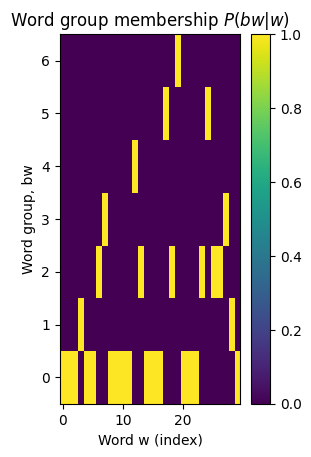

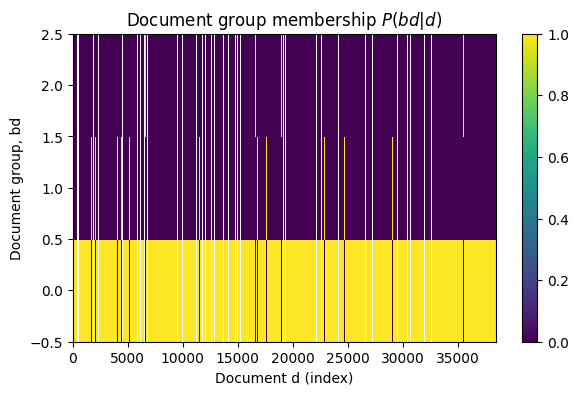

In [43]:
p_td_d,p_tw_w = model.group_membership(l=0)

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()